In [1]:
print("test")

test


In [1]:
import re
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# "magic" command to make plots show up in the notebook
%matplotlib inline 

In [2]:
rej_df = pd.read_csv("C:/Users/Mohammad Nahle/Downloads/Techlabs Data/RejectedLoans.csv")


In [3]:
rej_df.shape

(27648741, 9)

In [4]:
[col for col in rej_df.columns if 'fico' in col.lower()]


[]

In [5]:
rej_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [6]:
pd.options.display.max_rows


60

In [7]:
pd.options.display.max_rows = 1000


In [8]:
rej_df.head().T

,0,1,2,3,4
Amount Requested,1000.0,1000.0,11000.0,6000.0,1500.0
Application Date,2007-05-26,2007-05-26,2007-05-27,2007-05-27,2007-05-27
Loan Title,Wedding Covered but No Honeymoon,Consolidating Debt,Want to consolidate my debt,waksman,mdrigo
Risk_Score,693.0,703.0,715.0,698.0,509.0
Debt-To-Income Ratio,10%,10%,10%,38.64%,9.43%
Zip Code,481xx,010xx,212xx,017xx,209xx
State,NM,MA,MD,MA,MD
Employment Length,4 years,< 1 year,1 year,< 1 year,< 1 year
Policy Code,0.0,0.0,0.0,0.0,0.0


In [9]:
rej_df.tail().T


,27648736,27648737,27648738,27648739,27648740
Amount Requested,10000.0,10000.0,1200.0,25000.0,15000.0
Application Date,2016-12-31,2016-12-31,2016-12-31,2016-12-31,2016-12-31
Loan Title,Debt consolidation,moving,Other,debt_consolidation,Business
Risk_Score,590.0,NaN,686.0,NaN,684.0
Debt-To-Income Ratio,41.26%,1.48%,10.26%,17.71%,10.58%
Zip Code,441xx,207xx,914xx,880xx,113xx
State,OH,MD,CA,NM,NY
Employment Length,< 1 year,5 years,< 1 year,< 1 year,< 1 year
Policy Code,0.0,0.0,0.0,0.0,0.0


In [10]:
rej_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount Requested,27648741.0,13133.240309,15009.636324,0.0,4800.0,10000.0,20000.0,1400000.0
Risk_Score,9151111.0,628.172090,89.936793,0.0,591.0,637.0,675.0,990.0
Policy Code,27647823.0,0.006375,0.112737,0.0,0.0,0.0,0.0,2.0


In [11]:
################################# Understanding Each Variable ####################################
# Given the context of what we are supposed to do, 
# Amount Requested: High loan amounts might be riskier, especially if not commensurate with the borrower’s financial health.
# Risk Score: Directly relates to the likelihood of default. Lower scores could indicate higher risk.
# Debt-To-Income Ratio: High ratios may indicate that a borrower is over-leveraged and more likely to default on new debt.
# Employment Length: Shorter employment could suggest less stability, which might correlate with higher default rates.

In [12]:
################################# Data Cleaning #############################################
# Convert Debt-To-Income Ratio from an object to a numeric type after removing any non-numeric characters (like '%').
# Convert Application Date from an object to a datetime type for any time series analysis.
# Handle any missing values in Risk Score and other relevant fields either by imputation or removal, depending on the extent and nature of the missing data.

rej_df['Debt-To-Income Ratio'] = rej_df['Debt-To-Income Ratio'].astype(str)
rej_df['Debt-To-Income Ratio'] = rej_df['Debt-To-Income Ratio'].str.replace('%', '').astype(float)
rej_df['Application Date'] = pd.to_datetime(rej_df['Application Date'])
rej_df['Risk_Score'] = rej_df['Risk_Score'].fillna(rej_df['Risk_Score'].median())


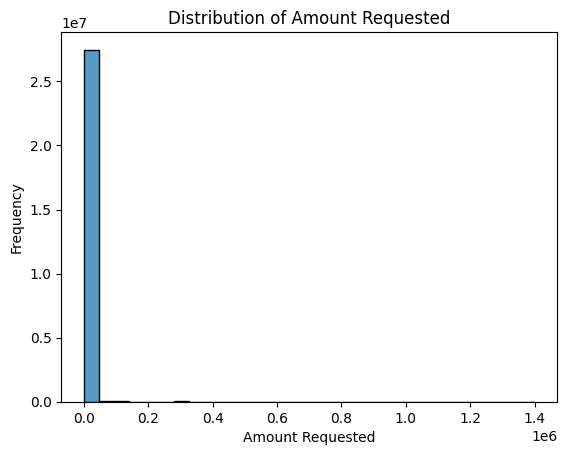

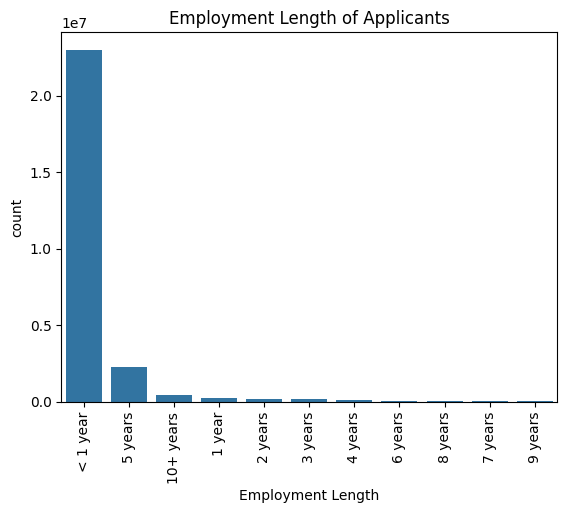

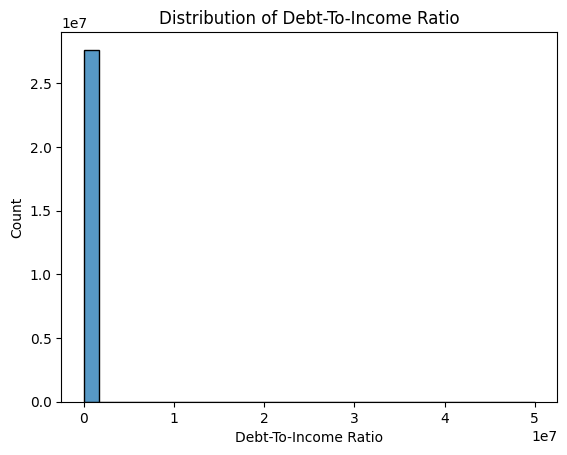

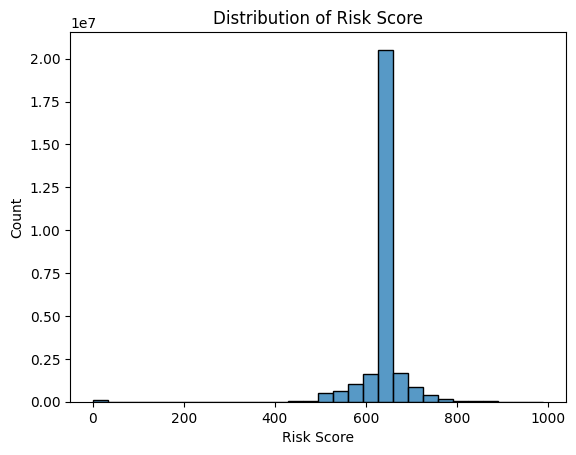

In [29]:
# Analyzing the distribution of Amount Requested
sns.histplot(rej_df['Amount Requested'] , bins = 30)
plt.title('Distribution of Amount Requested')
plt.xlabel('Amount Requested')
plt.ylabel('Frequency')
plt.show()

# it appears that the distribution is heavily skewed with 
# a large concentration of data points at the lower end of the range. 
# This type of distribution is common in financial data where many requests might be for smaller amounts,
# while fewer requests are for very large amounts.

# Employment Length
sns.countplot(x='Employment Length', data=rej_df, order = rej_df['Employment Length'].value_counts().index)
plt.title('Employment Length of Applicants')
plt.xticks(rotation=90)
plt.show()

# Debt-to-Income Ratio
sns.histplot(rej_df['Debt-To-Income Ratio'], bins = 30)
plt.title('Distribution of Debt-To-Income Ratio')
plt.xlabel('Debt-To-Income Ratio')
plt.show()


# Risk Score distribution
sns.histplot(rej_df['Risk_Score'], bins = 30)
plt.title('Distribution of Risk Score')
plt.xlabel('Risk Score')
plt.show()


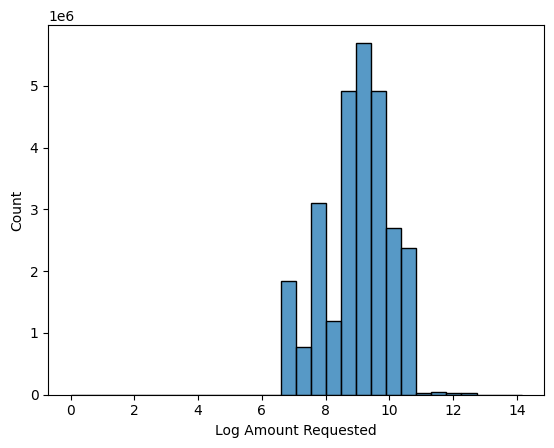

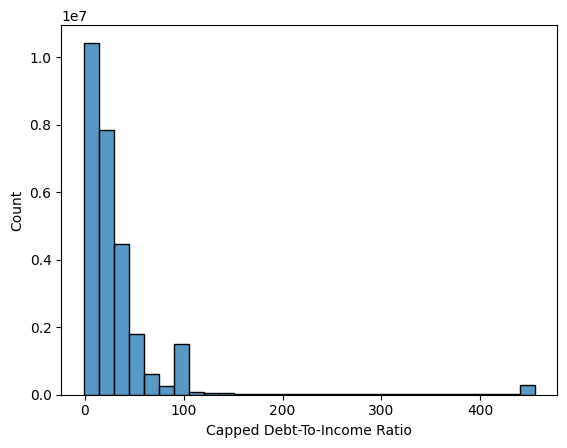

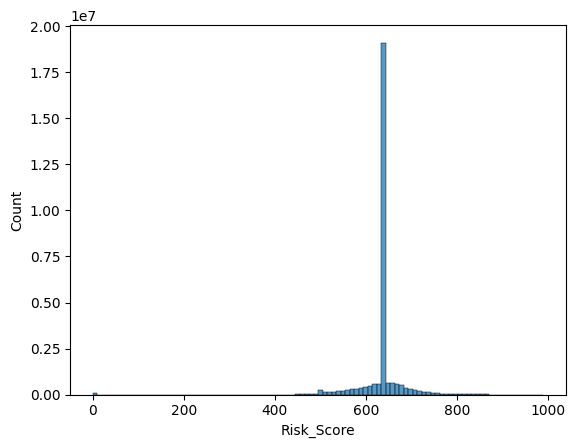

In [31]:
rej_df['Log Amount Requested'] = np.log1p(rej_df['Amount Requested']) #Logarithmic transformation help better visualize the distribution across different scales of amount requested.
sns.histplot(rej_df['Log Amount Requested'], bins=30)
plt.show()

cap_value = rej_df['Debt-To-Income Ratio'].quantile(0.99)  # Cap at the 99th percentile
rej_df['Capped Debt-To-Income Ratio'] = rej_df['Debt-To-Income Ratio'].clip(upper=cap_value)
sns.histplot(rej_df['Capped Debt-To-Income Ratio'], bins=30)
plt.show()

sns.histplot(rej_df['Risk_Score'], bins=100)  # Increased bins
plt.show()

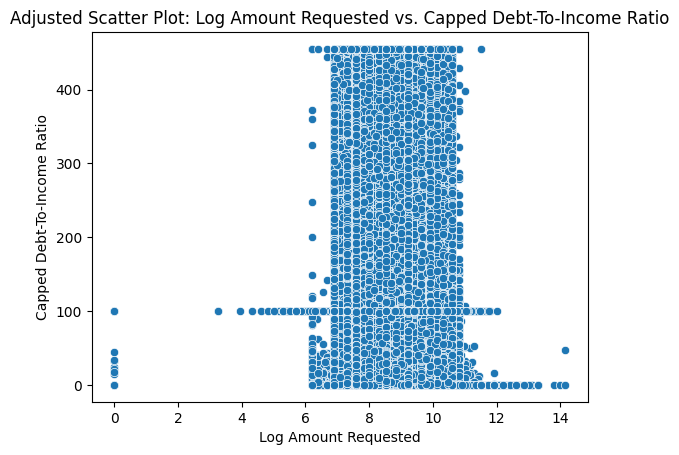

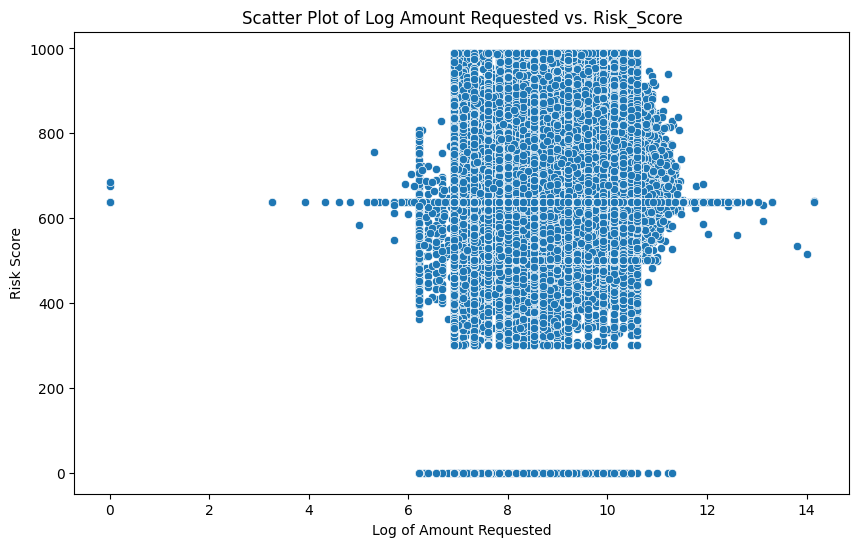

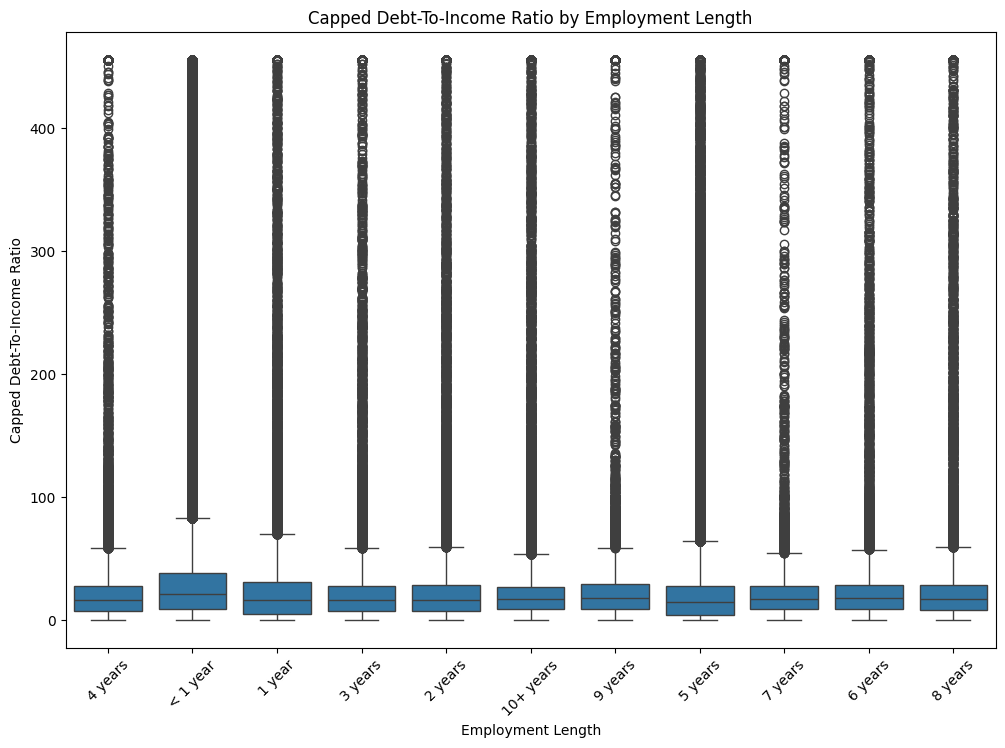

In [35]:
#################################### Bivariate Analysis #####################################################
rej_df['Log Amount Requested'] = np.log1p(rej_df['Amount Requested'])
rej_df['Capped Debt-To-Income Ratio'] = np.clip(rej_df['Debt-To-Income Ratio'], 0, rej_df['Debt-To-Income Ratio'].quantile(0.99))

# Bivariate analysis of transformed and original data
sns.scatterplot(x='Log Amount Requested', y='Capped Debt-To-Income Ratio', data=rej_df)
plt.title('Adjusted Scatter Plot: Log Amount Requested vs. Capped Debt-To-Income Ratio')
plt.show()

# The plot does not reveal a clear linear relationship between the log-transformed loan amount and the capped debt-to-income ratio. 
# Instead,the data shows that for a wide range of loan amounts,
#  particularly at higher values, applicants' debt-to-income ratios can vary significantly.
#################################### Bivariate Analysis #####################################################

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log Amount Requested', y='Risk_Score', data=rej_df)
plt.title('Scatter Plot of Log Amount Requested vs. Risk_Score')
plt.xlabel('Log of Amount Requested')
plt.ylabel('Risk Score')
plt.show()

# There isn't a clear linear relationship or trend visible in the plot, 
# indicating that higher loan amounts do not consistently correlate with higher or lower risk scores.
#################################### Bivariate Analysis #####################################################
plt.figure(figsize=(12, 8))
sns.boxplot(x='Employment Length', y='Capped Debt-To-Income Ratio', data=rej_df)
plt.title('Capped Debt-To-Income Ratio by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Capped Debt-To-Income Ratio')
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.show()
# The consistent median values across different employment lengths suggest that employment length alone does not significantly affect the debt-to-income ratio,
#  at least within the limits set by the capping. 
# The wide range in longer employment might reflect diverse financial circumstances or life stages of these individuals.

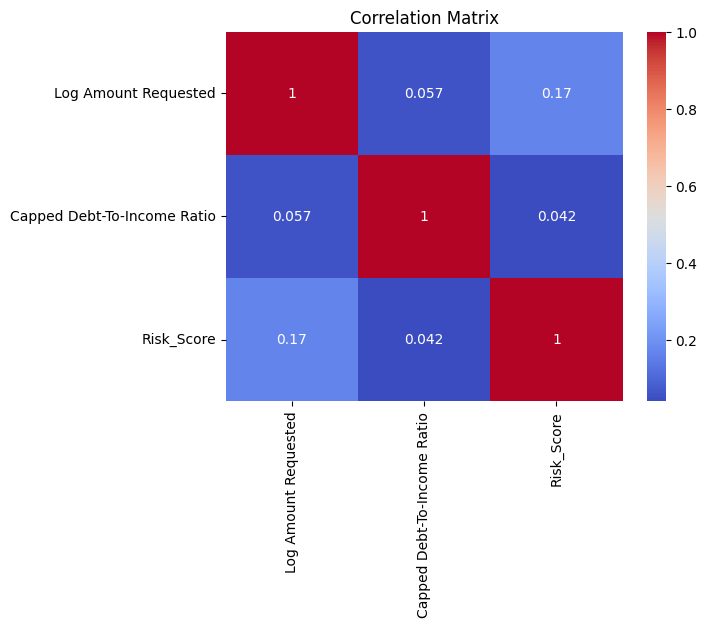

In [36]:
################################### Multivariate Analysis ##############################################
correlation_matrix = rej_df[['Log Amount Requested', 'Capped Debt-To-Income Ratio', 'Risk_Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Log Amount Requested and Capped Debt-To-Income Ratio: 0.057

#This value is very close to zero, suggesting that there is very little, if any, linear relationship between the log-transformed amount requested and the capped debt-to-income ratio. This implies that changes in the amount requested do not significantly correlate with changes in the debt-to-income ratio in a linear fashion.
#Log Amount Requested and Risk Score: 0.17

#This correlation coefficient, while still relatively low, is positive and suggests a slight positive linear relationship between the log-transformed amount requested and the risk score. This might indicate that as the amount requested increases, there is a slight increase in the risk score. However, the relationship is not strong.
#Capped Debt-To-Income Ratio and Risk Score: 0.042

#Similar to the first correlation, this value is also very close to zero, indicating a very weak linear relationship between the capped debt-to-income ratio and the risk score. This suggests that the risk score, which could reflect creditworthiness or likelihood of default, does not strongly depend on the debt-to-income ratio linearly.

In [ ]:
#There doesnt seem to be a strong correlation between the variables
# Correlation coefficients measure linear relationships. 
# If the relationships in the data are non-linear, typical correlation metrics like Pearson’s correlation will not capture them. 

# Advanced techniques or non-linear models might reveal deeper connections.